<a href="https://colab.research.google.com/github/SydneyTsuma/Week_4_Autolib_Project/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_03_Sydney_Tsuma_Data_Preparation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AUTOLIB DATA INVESTIGATION

##Introduction
The Notebook will be divided into two sections:
##Data Prepartion
We will be cleaning data based on observed inconsistencies.The objectives we shall tackle include :
1. Manipulating data types
2. Merging of columns
3. Dropping of columns
4. Handling outliers

##Data Analysis
In this section we will be answering questions regarding to Autolib's Services.They include:

**Main question**
1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

**Further questions**
2. What is the most popular hour for returnig a car ?
3. What is the most popular station ?
     * Overall
     * Most popular picking hour
4. What is the most popular postal code for picking up bluecars?
   Does the most popular station belong to that code?
5. Do the results change if you consider utilib and utilib 1.4








#Importing Libraries

In [111]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import matplot library
import matplotlib.pyplot as plt
% matplotlib inline 


# Loading our dataset 

In [112]:
# Read csv file containing Autolib dataset 
df_Autolib1=pd.read_csv('/content/Autolib_dataset.csv')
df_Autolib1



,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [113]:
# Print information about the dataset
df_Autolib1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

#  Section 1


##Data Preparation

###Dropping Irrelevant columns

In [114]:
# Drop columns that will not assist in evaluating the final outcome of the problems
df_Autolib=df_Autolib1.drop(columns=['Geo point','Cars','Charging Status','Charge Slots','Subscription status','Slots'],axis=1)
df_Autolib.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,station,ok,2018,4,8,17,23


###Merging of columns

In [115]:
# Merge Time and Date columns
df_Autolib['Date_Time']=df_Autolib['year'].astype(str).map(str) + df_Autolib['month'].astype(str).map(str) + df_Autolib['day'].astype(str).map(str)+df_Autolib['hour'].astype(str).map(str) + df_Autolib['minute'].astype(str).map(str)
df_Autolib.Date_Time = pd.to_datetime(df_Autolib.Date_Time , format='%Y%m%d%H%M', errors='coerce')
df_Autolib.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Station type,Status,year,month,day,hour,minute,Date_Time
0,2 Avenue de Suffren,0,0,0,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,station,ok,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,station,ok,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,station,ok,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,station,ok,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,station,ok,2018,4,8,17,23,2018-04-08 17:23:00


In [116]:
df_Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Address             5000 non-null   object        
 1   Bluecar counter     5000 non-null   int64         
 2   Utilib counter      5000 non-null   int64         
 3   Utilib 1.4 counter  5000 non-null   int64         
 4   City                5000 non-null   object        
 5   Displayed comment   111 non-null    object        
 6   ID                  5000 non-null   object        
 7   Kind                5000 non-null   object        
 8   Postal code         5000 non-null   int64         
 9   Public name         5000 non-null   object        
 10  Rental status       5000 non-null   object        
 11  Scheduled at        47 non-null     object        
 12  Station type        5000 non-null   object        
 13  Status              5000 non-null   object      

In [117]:
# Drop columns Time and Date columns

df_Autolib.drop(['year','month','day','hour','minute'], axis=1, inplace= True)
df_Autolib.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Station type,Status,Date_Time
0,2 Avenue de Suffren,0,0,0,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,station,ok,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,station,ok,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,station,ok,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,station,ok,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,station,ok,2018-04-08 17:23:00


###Handling Outliers

In [118]:
# Describe dataset information
df_Autolib.describe()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Postal code
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.333600,0.059600,0.123000,82634.878400
std,2.035274,0.246698,0.356506,8835.865721
min,0.000000,0.000000,0.000000,75001.000000
25%,0.000000,0.000000,0.000000,75012.000000
50%,2.000000,0.000000,0.000000,75019.000000
75%,4.000000,0.000000,0.000000,92320.000000
max,7.000000,2.000000,3.000000,95880.000000


In [119]:
# Identify Quantiles of data in specific columns

quantiles=df_Autolib.quantile([0.25 , 0.5 , 0.75])
quantiles.drop(['Postal code'],axis=1)

,Bluecar counter,Utilib counter,Utilib 1.4 counter
0.25,0.0,0.0,0.0
0.50,2.0,0.0,0.0
0.75,4.0,0.0,0.0


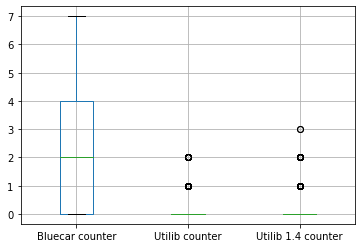

In [120]:
# Visualising outliers in specified columns using boxpolots
df_Autolib.boxplot(column =['Bluecar counter','Utilib counter','Utilib 1.4 counter']) 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f614ee82bd0>,
      dtype=object)

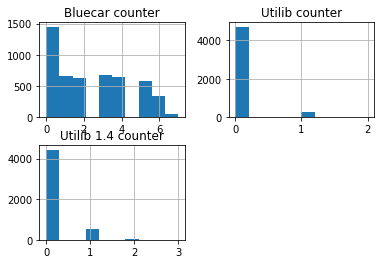

In [121]:
# Visualising outliers using histograms
df_Autolib.hist(['Bluecar counter','Utilib counter','Utilib 1.4 counter'])


In [122]:
# Using the IQR to drop identified outliers
# Determine IQR
Q1 = df_Autolib.quantile(0.25)
Q3 = df_Autolib.quantile(0.75)
IQR = Q3 - Q1
IQR

Bluecar counter           4.0
Utilib counter            0.0
Utilib 1.4 counter        0.0
Postal code           17308.0
dtype: float64

In [123]:
# Dropping the outliers
# Comparing the shape after dropping
df_Autolib_Drop = df_Autolib[~((df_Autolib < (Q1 - 1.5 * IQR)) | (df_Autolib > (Q3 + 1.5 * IQR))),any(axis=1)]

TypeError: ignored

# Section 2

## Data Analysis

### 2.1 Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018?

In [124]:
# Select the city of paris
df_Autolib_Paris =df_Autolib[df_Autolib['City'] == 'Paris']
df_Autolib_Paris.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Station type,Status,Date_Time
0,2 Avenue de Suffren,0,0,0,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,station,ok,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,station,ok,2018-04-06 07:24:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,station,ok,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,station,ok,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,NaN,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,NaN,station,ok,2018-04-06 07:02:00


In [125]:
# Group by hour to find the most popular time to pick blue cars
df_Paris_Hour=df_Autolib_Paris.groupby(['Date_Time'])['Bluecar counter'].sum().diff().sort_values(ascending = False)
df_Paris_Hour.head(10)

Date_Time
2018-04-21 04:03:00    14.0
2018-04-06 05:52:00    11.0
2018-04-06 22:29:00    10.0
2018-04-05 19:34:00    10.0
2018-04-22 04:00:00    10.0
2018-04-04 11:22:00     9.0
2018-04-04 12:09:00     9.0
2018-04-04 16:28:00     9.0
2018-04-05 22:26:00     9.0
2018-04-06 15:07:00     8.0
Name: Bluecar counter, dtype: float64

###2.2 What is the most popular hour for returning cars?

In [139]:
# Outliers not considered
df_Paris_Hour=df_Autolib_Paris.groupby(['Date_Time'])['Bluecar counter'].sum().diff().sort_values(ascending = True)
df_Paris_Hour.head(10)

# 2018-04-06 14:48:00

Date_Time
2018-04-06 15:28:00   -12.0
2018-04-05 07:47:00   -12.0
2018-04-06 05:53:00   -11.0
2018-04-22 04:01:00    -9.0
2018-04-06 14:48:00    -8.0
2018-04-04 05:06:00    -8.0
2018-04-09 21:07:00    -8.0
2018-04-03 21:00:00    -8.0
2018-04-05 22:27:00    -8.0
2018-04-09 13:35:00    -8.0
Name: Bluecar counter, dtype: float64

In [127]:
df_Autolib.loc[df_Autolib.Date_Time== '2018-04-06 14:48:00']

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Station type,Status,Date_Time
344,35 rue Victor MassÃ©,0,0,1,Paris,NaN,paris-victormasse-35,STATION,75009,Paris/Victor MassÃ©/35,operational,NaN,station,ok,2018-04-06 14:48:00


### 2.3 What station is the most popular?Overall?At the most popular picking hour?

In [134]:
# The most popular station
Pop_Station=df_Autolib['Address'].groupby(df_Autolib['Postal code'])
Pop_Station.head().max()

'Place Montgolfier - Parking Montgolfier'

###2.4 What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?Overall?At the most popular picking hour?

In [137]:
Pop_Postal_code = df_Autolib['Bluecar counter'].groupby(df_Autolib['Postal code'])
Pop_Postal_code.max().head()

Postal code
75001    4
75002    5
75003    6
75004    4
75005    6
Name: Bluecar counter, dtype: int64

###2.5 Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 